<a href="https://www.kaggle.com/code/khushishar/gold-price-time-series-analysis?scriptVersionId=166226263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gold Price Stock Market Prediction and Analysis

In [1]:
# Installing pmdarima
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.api import Holt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

2024-03-09 21:35:43.268949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 21:35:43.269137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 21:35:43.409559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv(r'/kaggle/input/gold-price-dataset/goldstock.csv')
df.head()

Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.head()

Date   Close    Volume    Open    High     Low
0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.head()

Close    Volume    Open    High     Low
Date                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.head()

Close    Volume    Open    High     Low
Date                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [11]:
df.index.dtype

dtype('<M8[ns]')

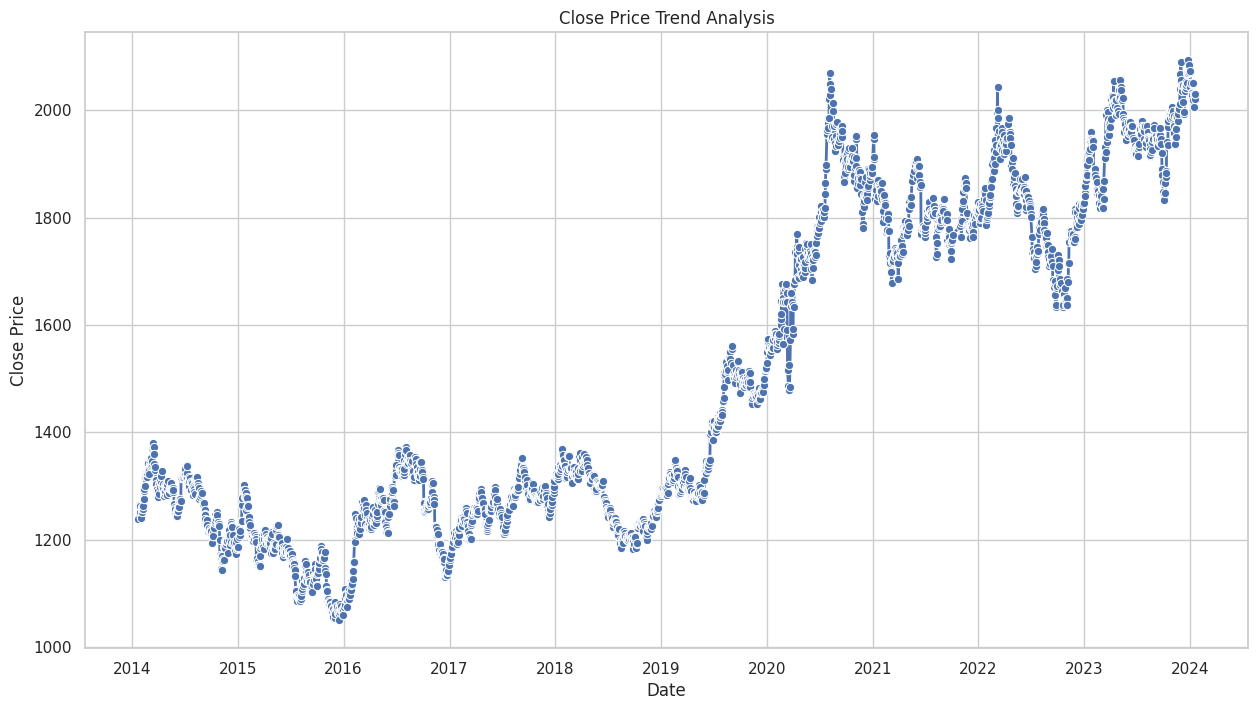

In [12]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=df.index, y=df['Close'], marker='o', color='b', linewidth=2)

plt.title('Close Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [13]:
df.head()

Close    Volume    Open    High     Low
Date                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [14]:
close_data = df['Close'].values

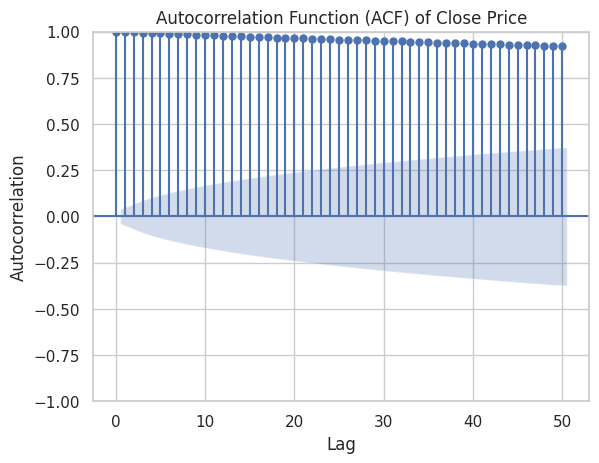

In [15]:
plot_acf(close_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Close Price')
plt.show()

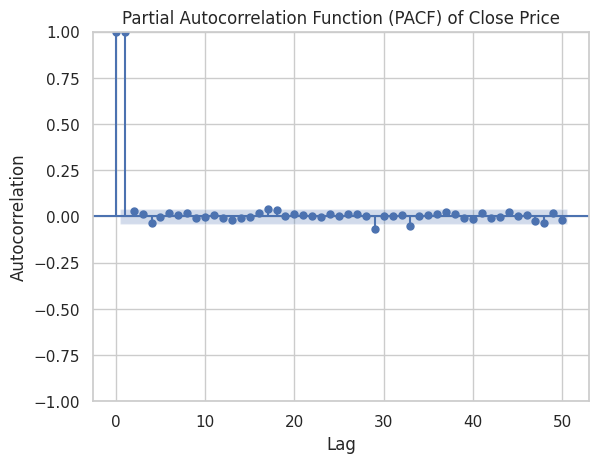

In [16]:
plot_pacf(close_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Close Price')
plt.show()

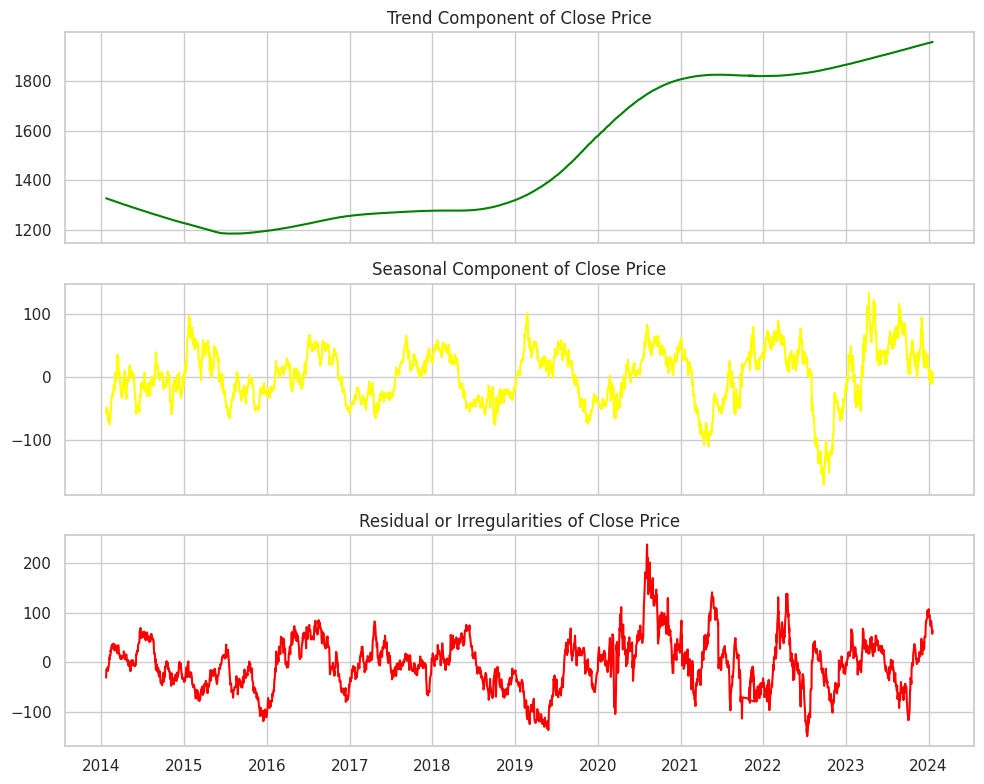

In [17]:
stl = STL(close_data, period=365)  
analysis = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(df.index, analysis.trend, label='Trend', color='green')
ax1.set_title('Trend Component of Close Price')

ax2.plot(df.index, analysis.seasonal, label='Seasonal', color='yellow')
ax2.set_title('Seasonal Component of Close Price')

ax3.plot(df.index, analysis.resid, label='Residual', color='red')
ax3.set_title('Residual or Irregularities of Close Price')

plt.tight_layout()

plt.show()

In [18]:
#Statistical test for Stationarity
result = adfuller(close_data)
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -1.7172755789704768
P-value: 0.4222342775667287


In [19]:
filtered_df = df[df.index < '2016-01-01'] 

In [20]:
filtered_df.head()

Close   Volume    Open    High     Low
Date                                               
2015-12-31  1060.2  53272.0  1060.6  1062.7  1056.5
2015-12-30  1059.8   5260.0  1068.2  1070.5  1059.8
2015-12-29  1068.0   5260.0  1068.2  1070.5  1067.7
2015-12-28  1068.3  66151.0  1068.6  1076.5  1065.7
2015-12-24  1075.9  47886.0  1069.6  1076.6  1069.5

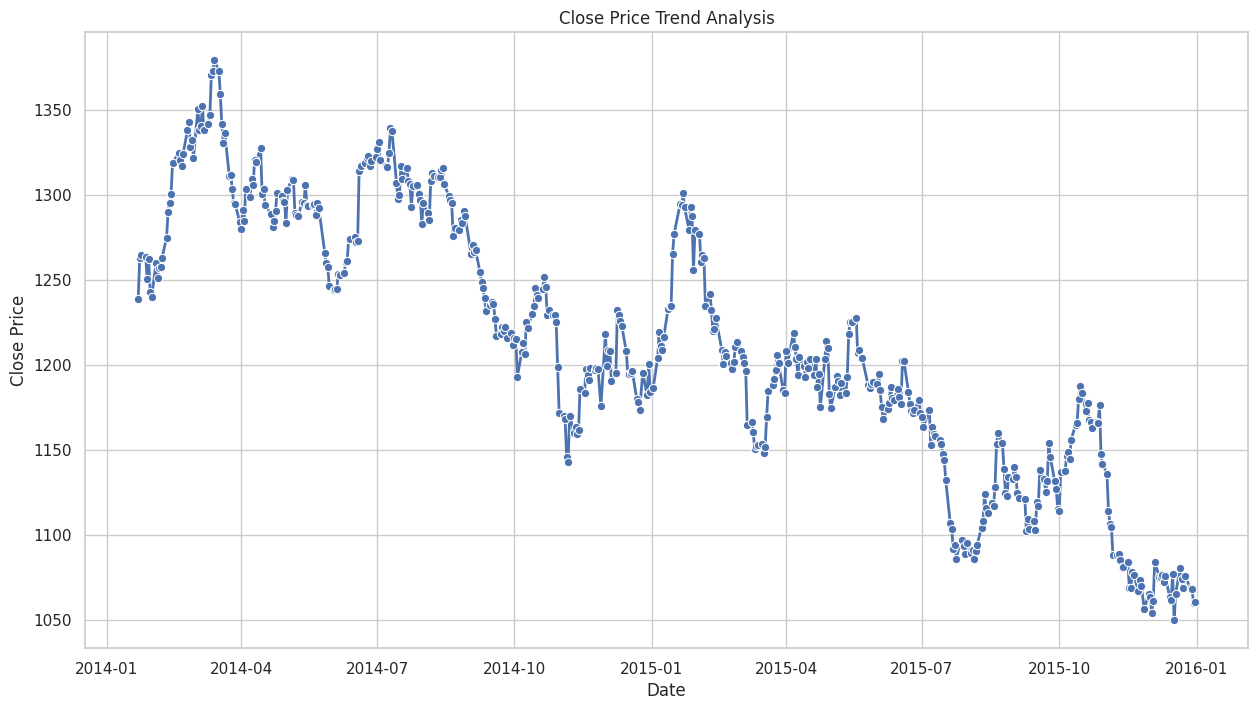

In [21]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=filtered_df.index, y=filtered_df['Close'], marker='o', color='b', linewidth=2)

plt.title('Close Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [22]:
filtered_close_data = filtered_df['Close']

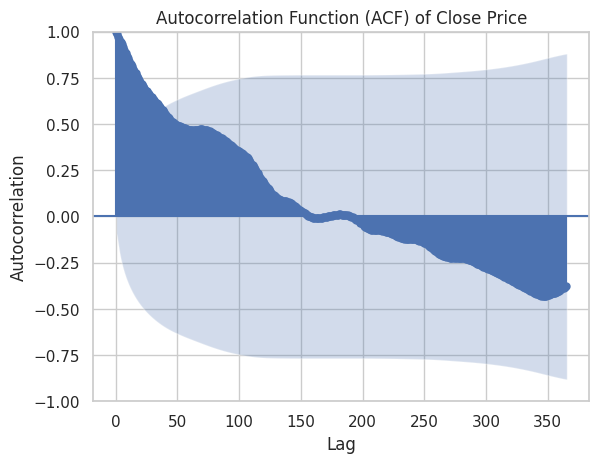

In [23]:
plot_acf(filtered_close_data, lags=365)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Close Price')
plt.show()

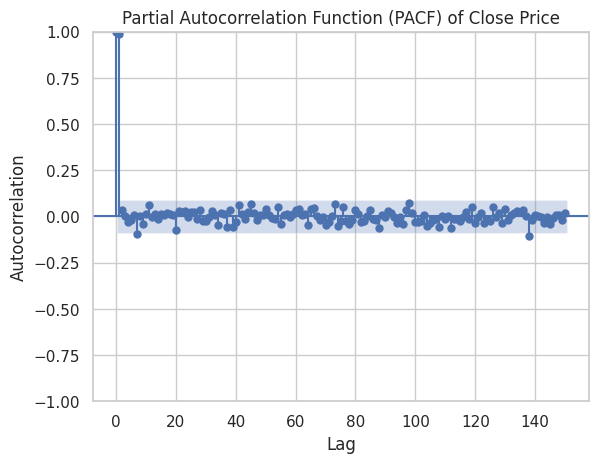

In [24]:
plot_pacf(filtered_close_data, lags=150)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Close Price')
plt.show()

In [25]:
first_year_df = df[df.index < '2015-01-01'] 
first_year_df.head()

Close    Volume    Open    High     Low
Date                                                
2014-12-31  1184.1   67231.0  1199.8  1203.9  1179.5
2014-12-30  1200.4  131961.0  1182.9  1210.9  1180.5
2014-12-29  1181.9   78521.0  1194.9  1197.5  1178.6
2014-12-26  1195.3   65571.0  1175.2  1199.1  1175.2
2014-12-24  1173.5   40192.0  1176.8  1181.2  1172.7

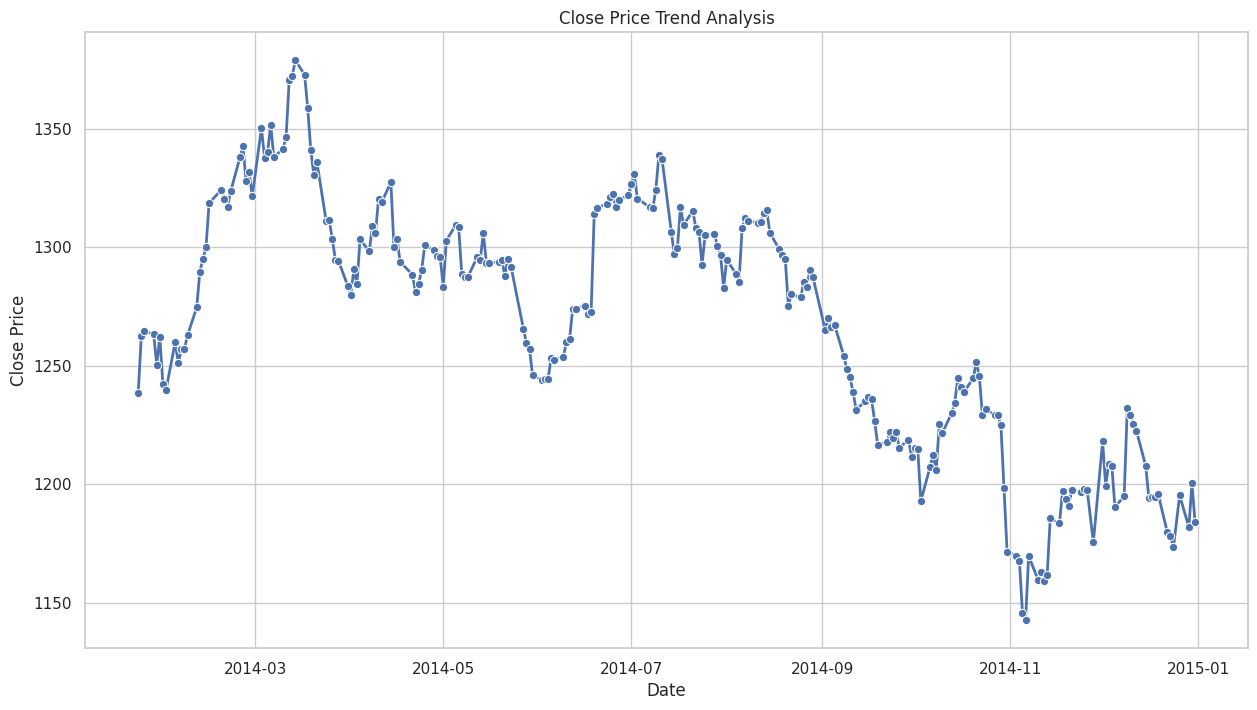

In [26]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=first_year_df.index, y=first_year_df['Close'], marker='o', color='b', linewidth=2)

plt.title('Close Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [27]:
firstyear_close_data = first_year_df['Close']

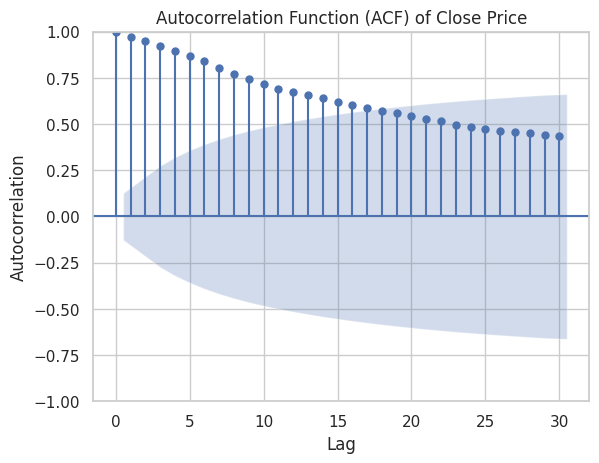

In [28]:
plot_acf(firstyear_close_data, lags=30)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Close Price')
plt.show()

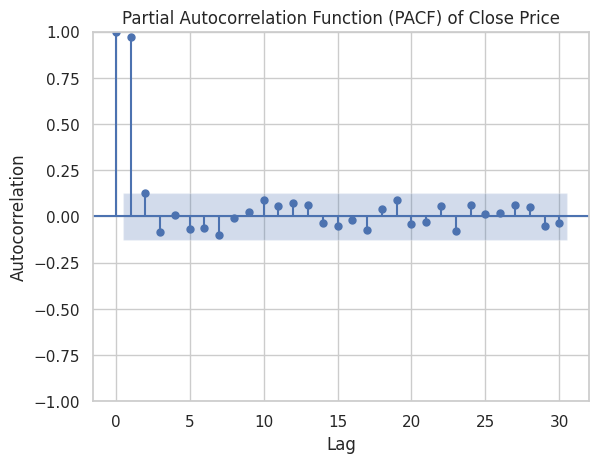

In [29]:
plot_pacf(firstyear_close_data, lags=30)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Close Price')
plt.show()

In [30]:
average_price_per_year = df.groupby(df.index.year)['Close'].mean()

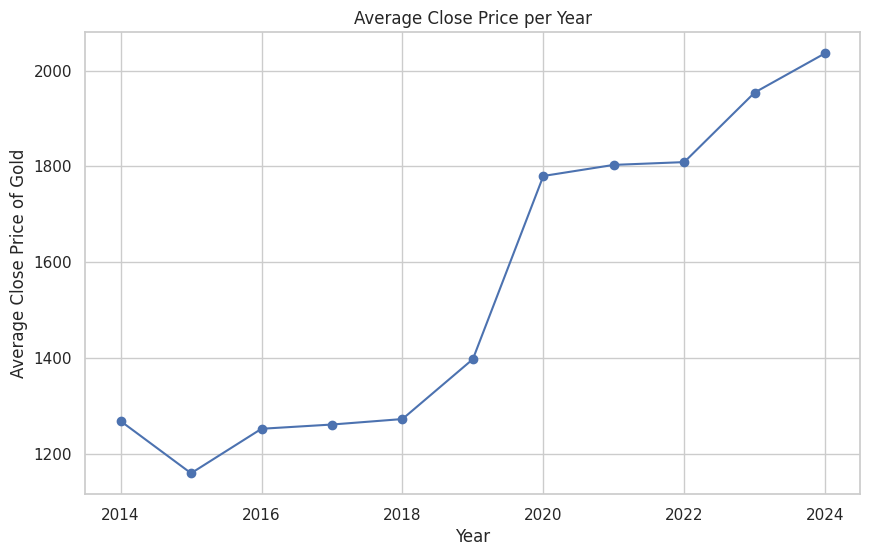

In [31]:
average_price_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Close Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price of Gold')
plt.grid(True)
plt.show()

Open Price Time Series Analysis

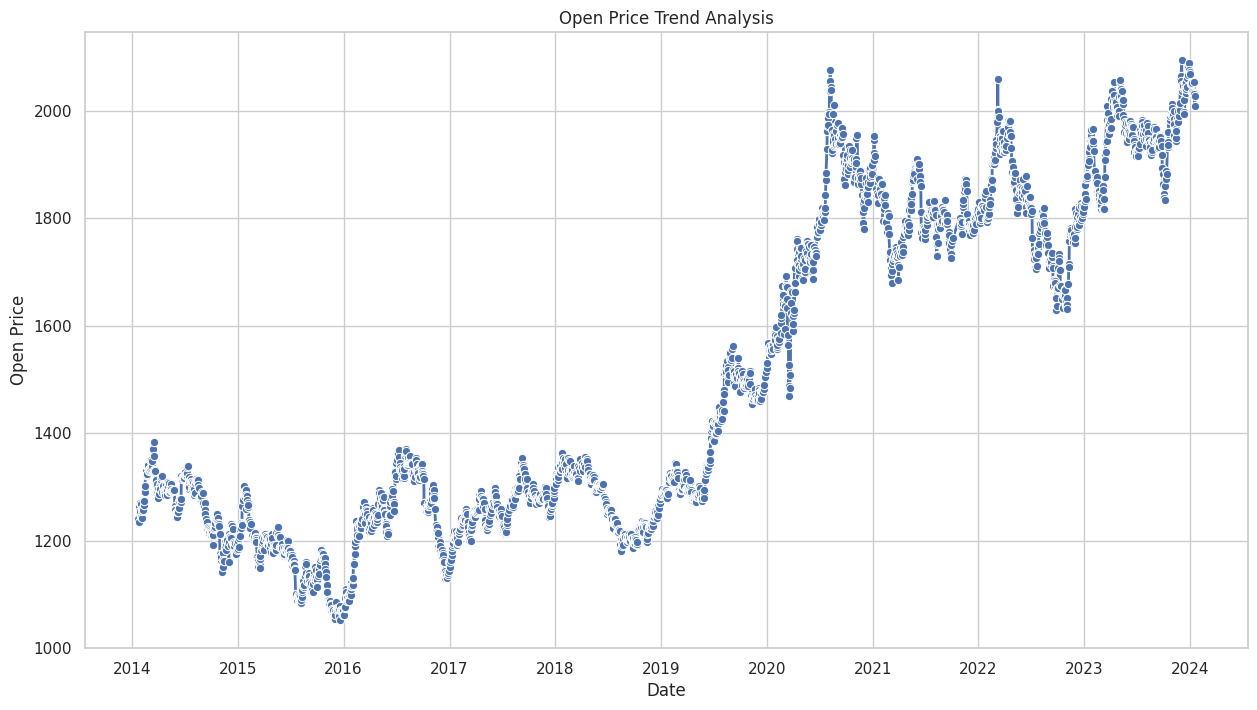

In [32]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=df.index, y=df['Open'], marker='o', color='b', linewidth=2)

plt.title('Open Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Open Price')

plt.show()

In [33]:
open_data = df['Open'].values

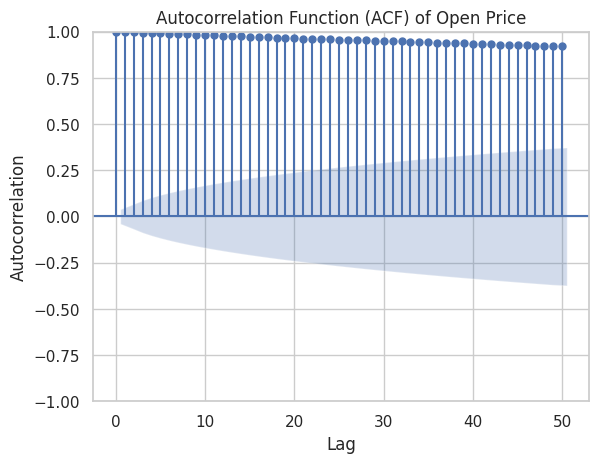

In [34]:
plot_acf(open_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Open Price')
plt.show()

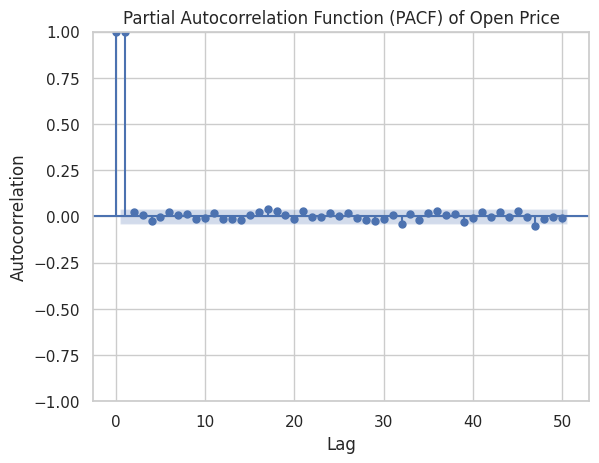

In [35]:
plot_pacf(open_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Open Price')
plt.show()

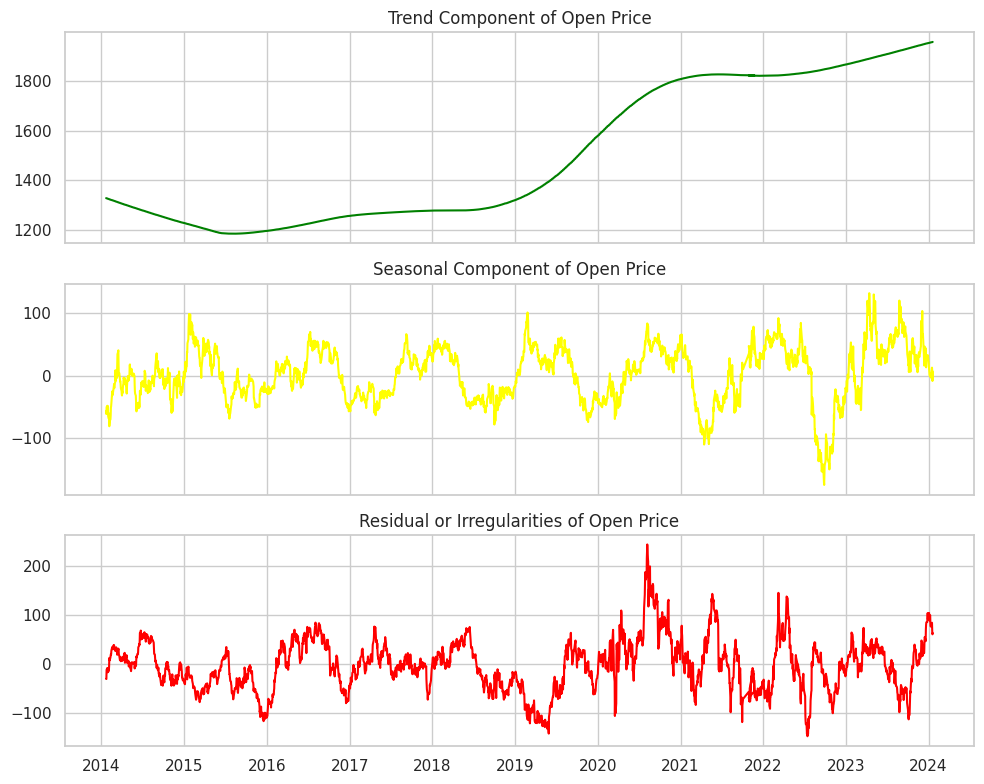

In [36]:
stl = STL(open_data, period=365)  
analysis = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(df.index, analysis.trend, label='Trend', color='green')
ax1.set_title('Trend Component of Open Price')

ax2.plot(df.index, analysis.seasonal, label='Seasonal', color='yellow')
ax2.set_title('Seasonal Component of Open Price')

ax3.plot(df.index, analysis.resid, label='Residual', color='red')
ax3.set_title('Residual or Irregularities of Open Price')

plt.tight_layout()

plt.show()

In [37]:
#Statistical test for Stationarity
result = adfuller(open_data)
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -1.7193031091311057
P-value: 0.42119537823171926


In [38]:
filtered_open_data = filtered_df['Open']

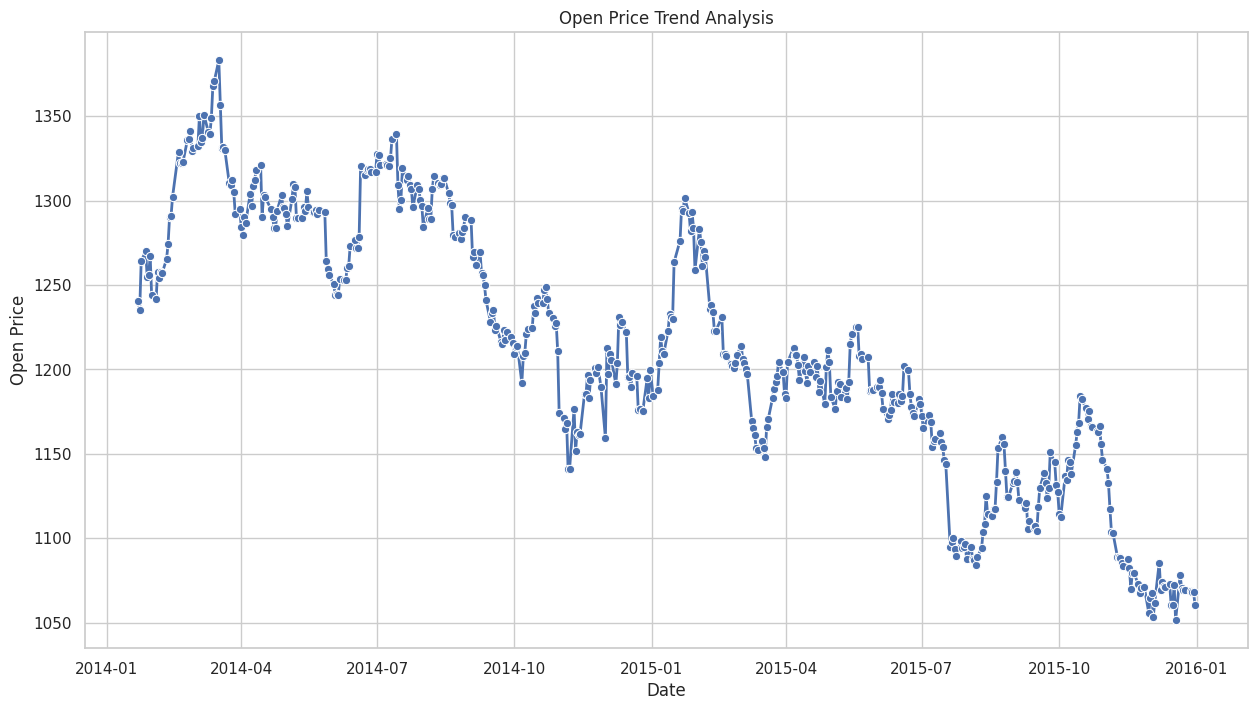

In [39]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=filtered_df.index, y=filtered_df['Open'], marker='o', color='b', linewidth=2)

plt.title('Open Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

In [40]:
filtered_open_data = filtered_df['Open']

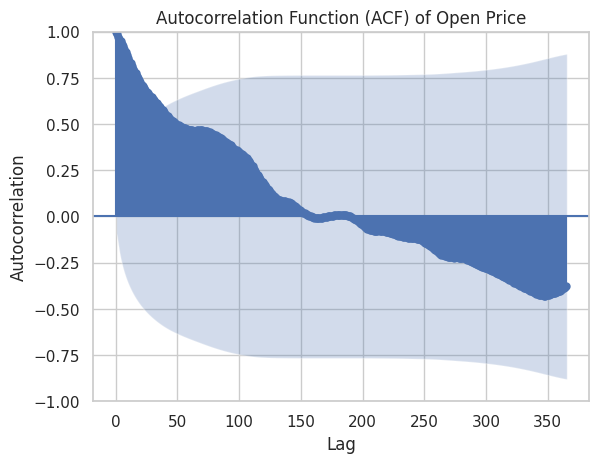

In [41]:
plot_acf(filtered_open_data, lags=365)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Open Price')
plt.show()

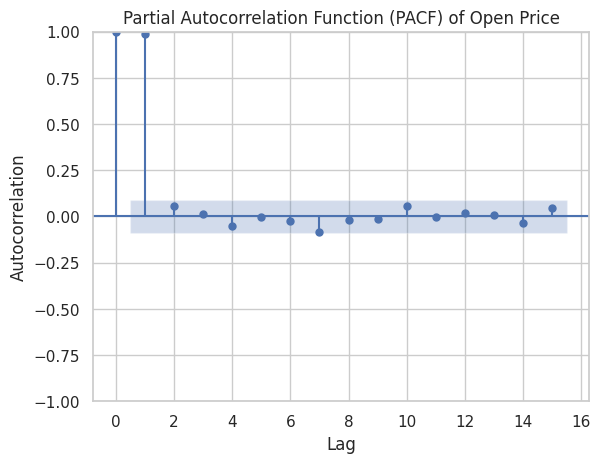

In [42]:
plot_pacf(filtered_open_data, lags=15)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Open Price')
plt.show()

In [43]:
average_openprice_per_year = df.groupby(df.index.year)['Open'].mean()

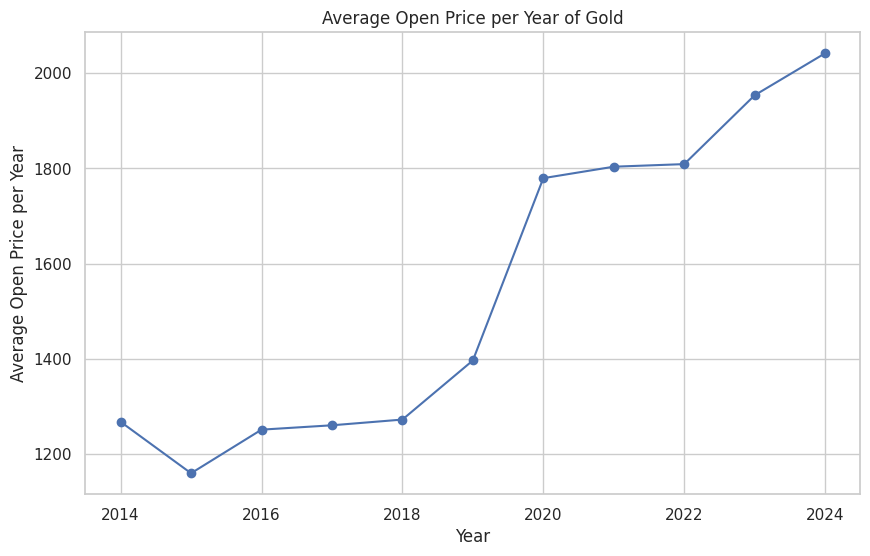

In [44]:
average_openprice_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Open Price per Year of Gold')
plt.xlabel('Year')
plt.ylabel('Average Open Price per Year')
plt.grid(True)
plt.show()

High Price Time Series Analysis

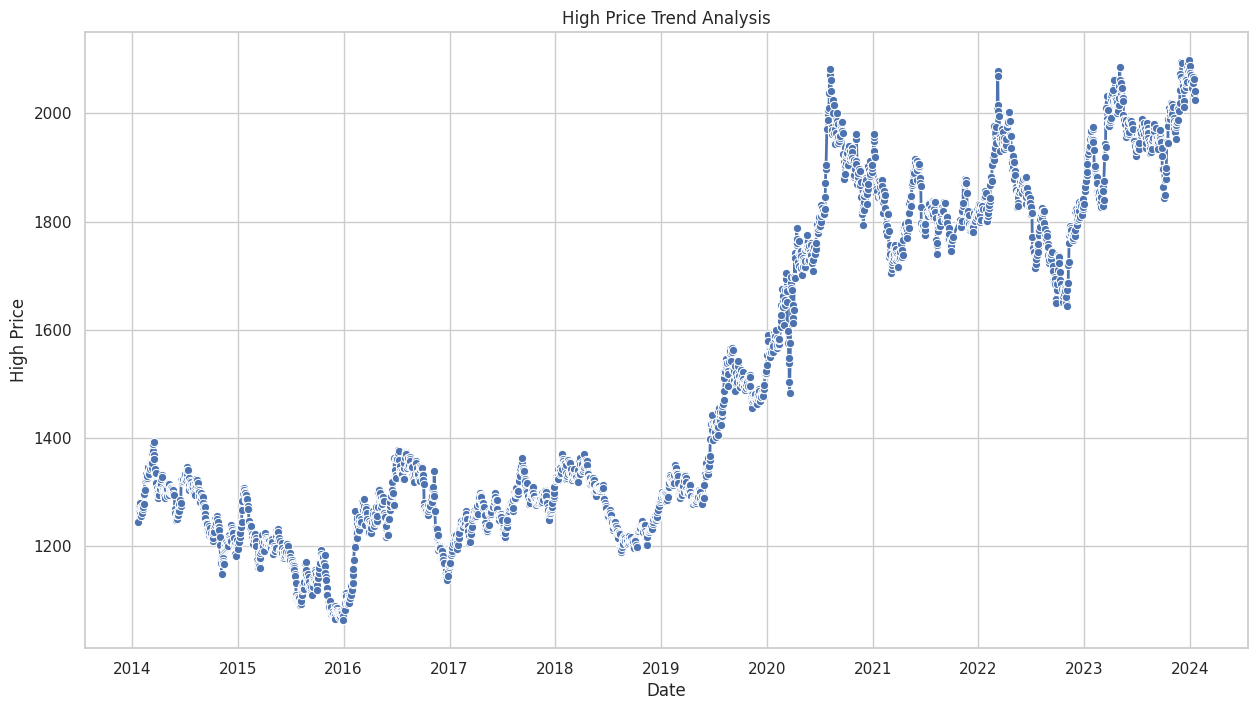

In [45]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=df.index, y=df['High'], marker='o', color='b', linewidth=2)

plt.title('High Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.show()

In [46]:
high_data = df['High'].values

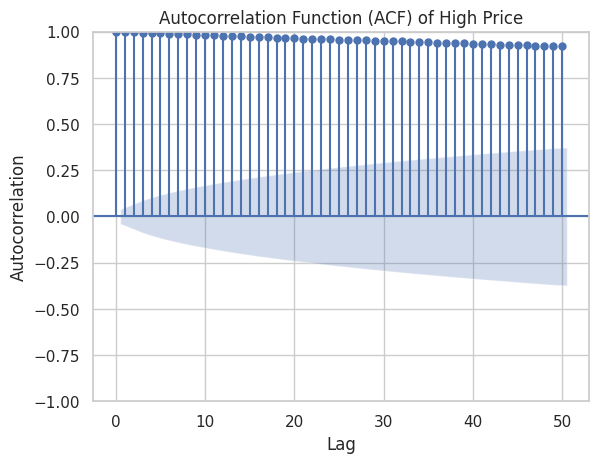

In [47]:
plot_acf(high_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of High Price')
plt.show()

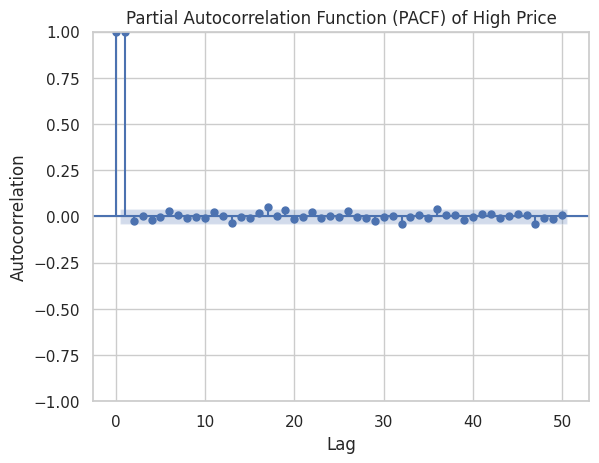

In [48]:
plot_pacf(high_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of High Price')
plt.show()

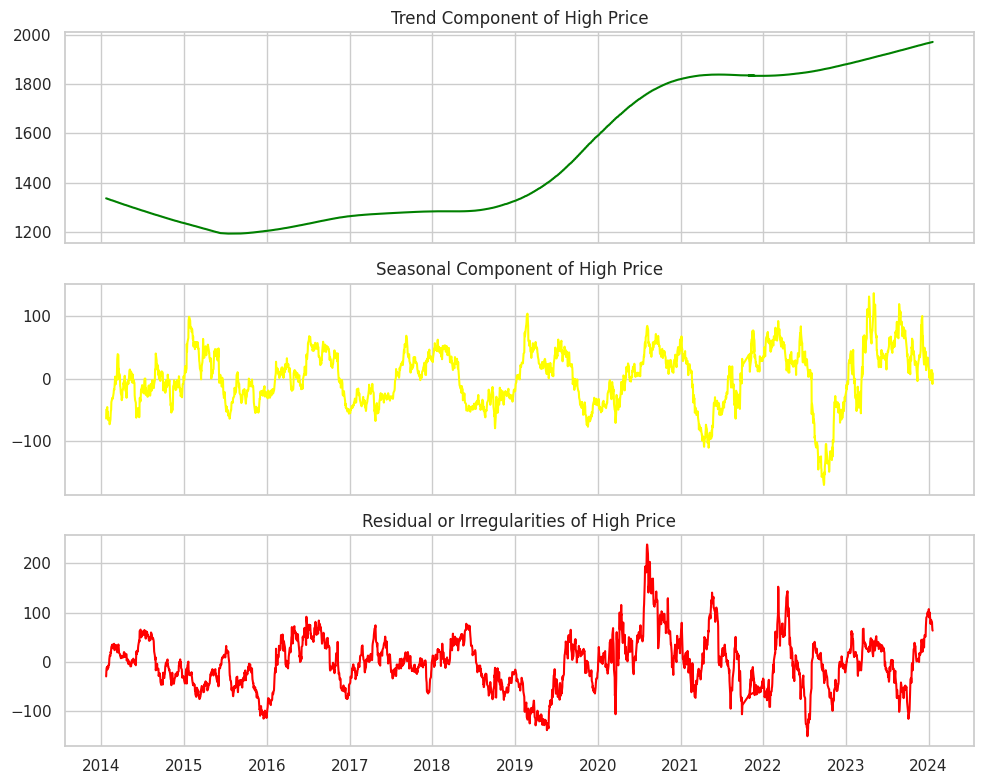

In [49]:
stl = STL(high_data, period=365)  
analysis = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(df.index, analysis.trend, label='Trend', color='green')
ax1.set_title('Trend Component of High Price')

ax2.plot(df.index, analysis.seasonal, label='Seasonal', color='yellow')
ax2.set_title('Seasonal Component of High Price')

ax3.plot(df.index, analysis.resid, label='Residual', color='red')
ax3.set_title('Residual or Irregularities of High Price')

plt.tight_layout()

plt.show()

In [50]:
#Statistical test for Stationarity
result = adfuller(high_data)
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -1.661563469618377
P-value: 0.4510169335032378


In [51]:
filtered_high_data = filtered_df['High']

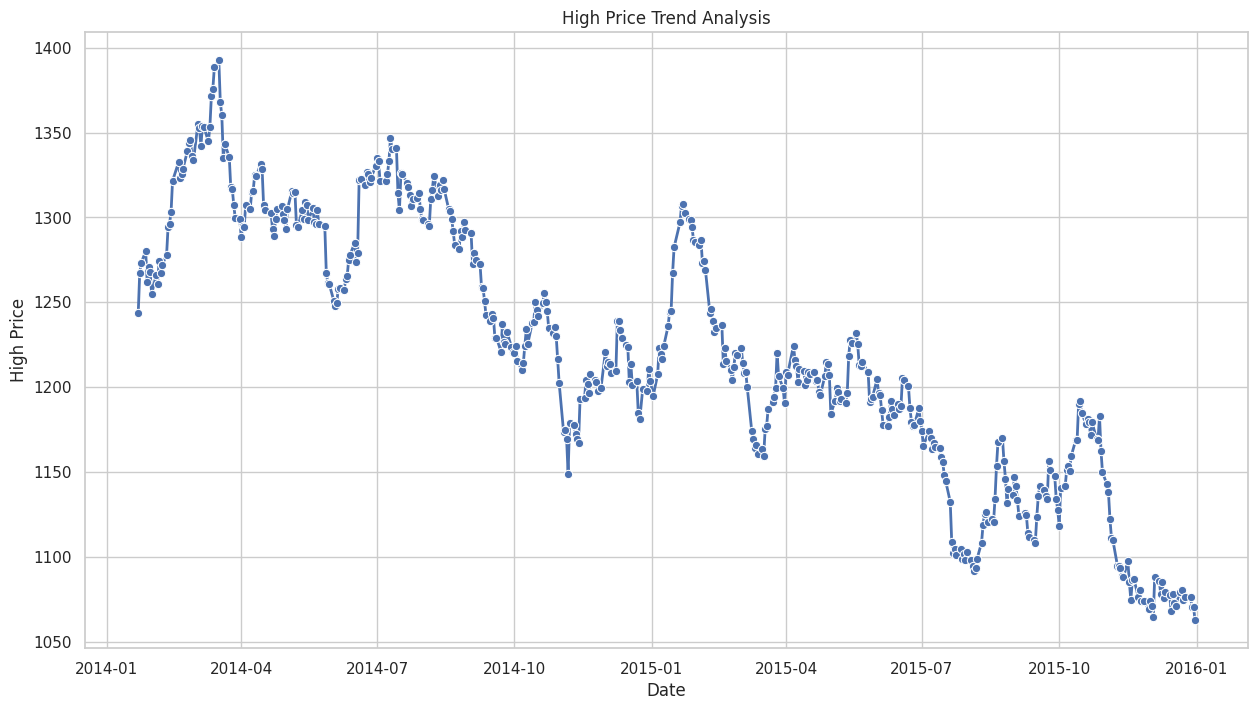

In [52]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=filtered_df.index, y=filtered_df['High'], marker='o', color='b', linewidth=2)

plt.title('High Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

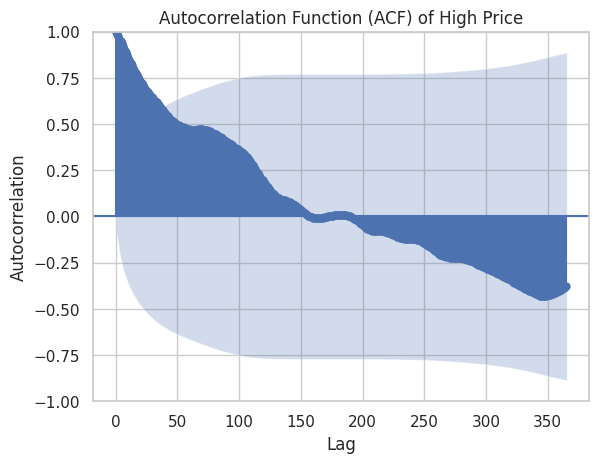

In [53]:
plot_acf(filtered_high_data, lags=365)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of High Price')
plt.show()

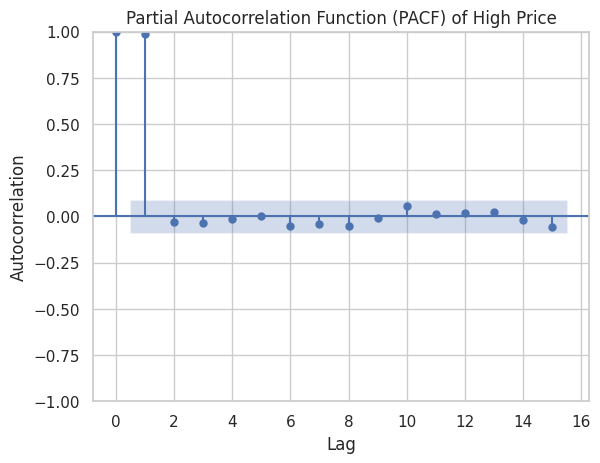

In [54]:
plot_pacf(filtered_high_data, lags=15)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of High Price')
plt.show()

In [55]:
average_highprice_per_year = df.groupby(df.index.year)['High'].mean()

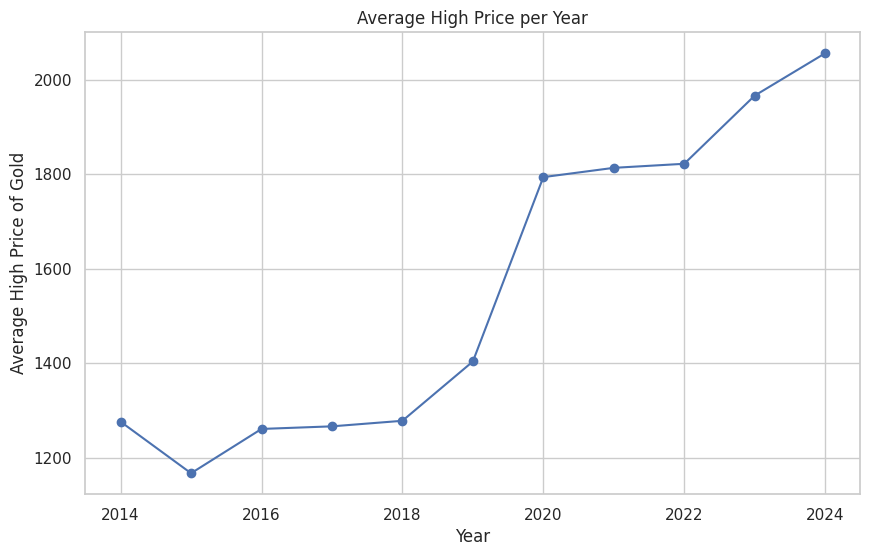

In [56]:
average_highprice_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average High Price per Year')
plt.xlabel('Year')
plt.ylabel('Average High Price of Gold')
plt.grid(True)
plt.show()

Low Price Time Series Analysis

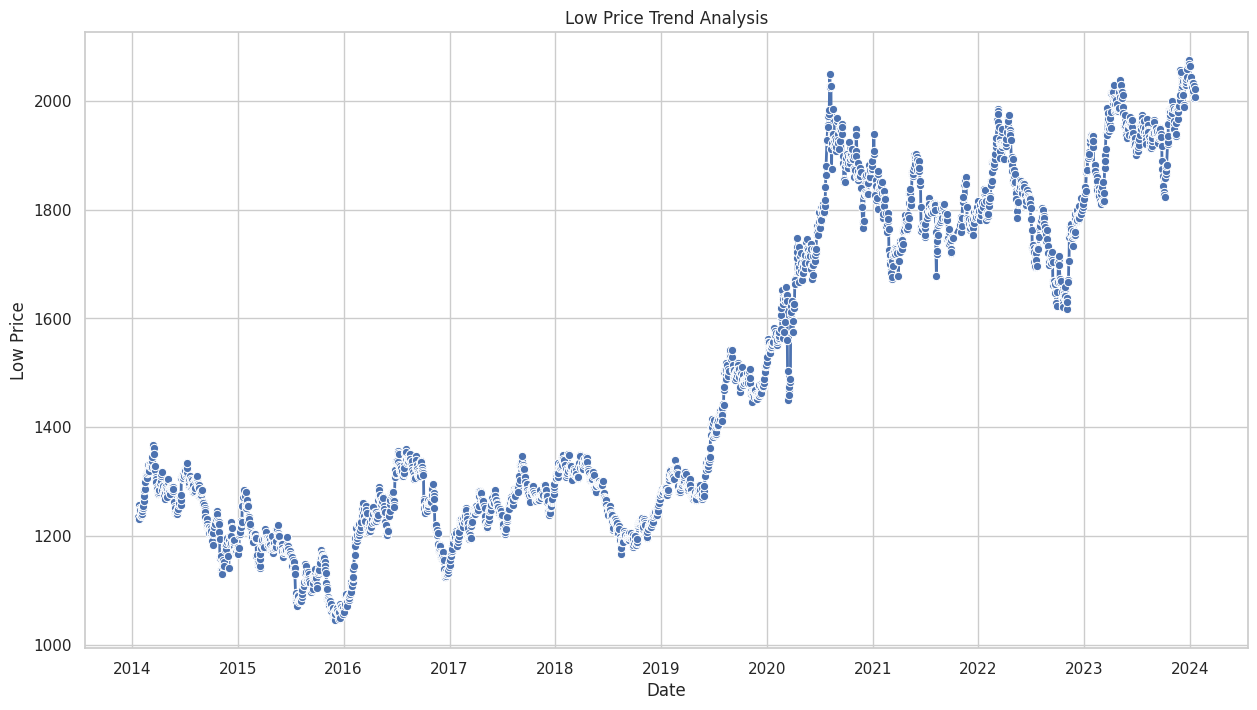

In [57]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=df.index, y=df['Low'], marker='o', color='b', linewidth=2)

plt.title('Low Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Low Price')

plt.show()

In [58]:
low_data = df['Low'].values

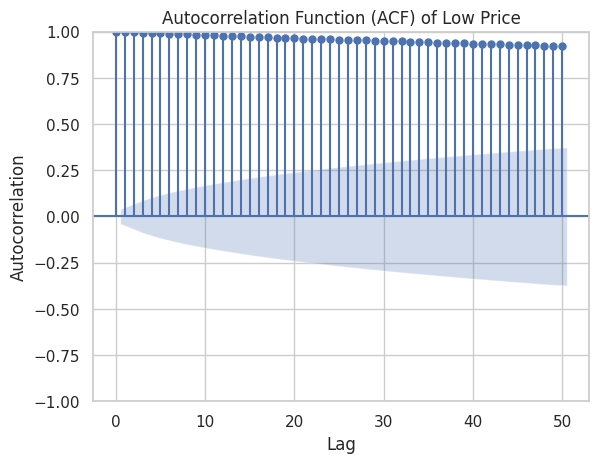

In [59]:
plot_acf(low_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Low Price')
plt.show()

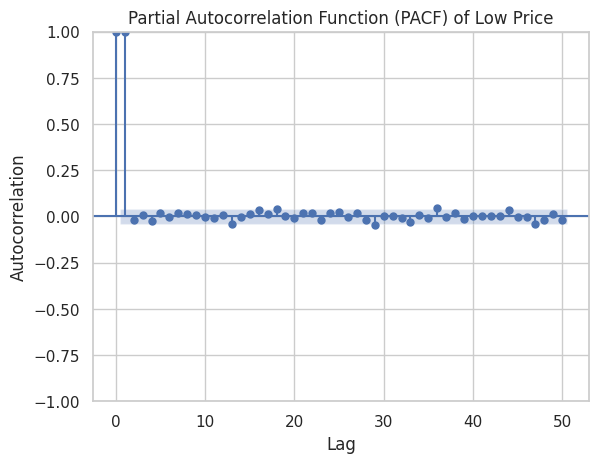

In [60]:
plot_pacf(low_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Low Price')
plt.show()

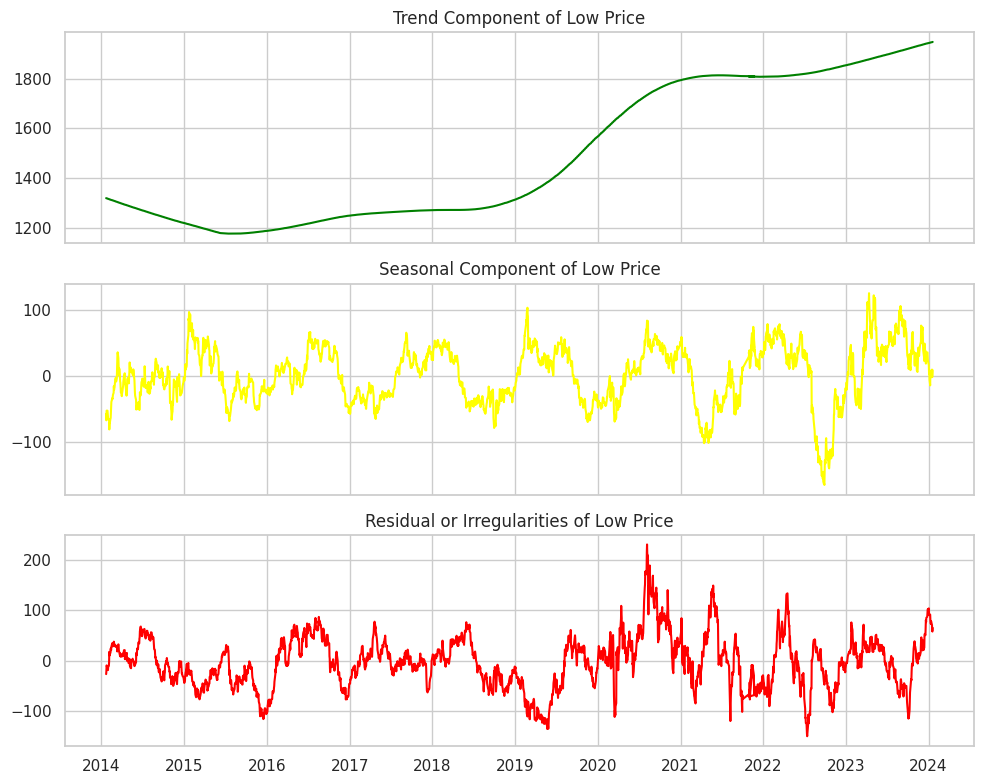

In [61]:
stl = STL(low_data, period=365)  
analysis = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(df.index, analysis.trend, label='Trend', color='green')
ax1.set_title('Trend Component of Low Price')

ax2.plot(df.index, analysis.seasonal, label='Seasonal', color='yellow')
ax2.set_title('Seasonal Component of Low Price')

ax3.plot(df.index, analysis.resid, label='Residual', color='red')
ax3.set_title('Residual or Irregularities of Low Price')

plt.tight_layout()

plt.show()

In [62]:
#Statistical test for Stationarity
result = adfuller(low_data)
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -1.7126629975412329
P-value: 0.424600212814019


In [63]:
filtered_low_data = filtered_df['Low']

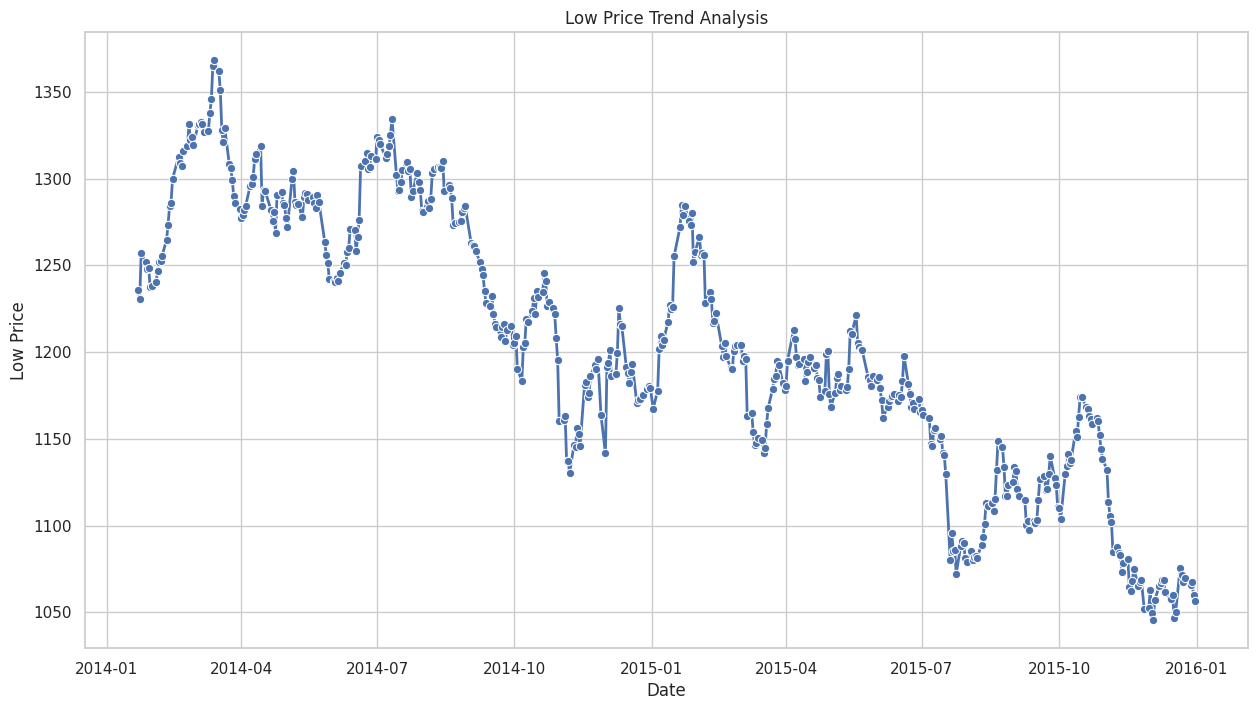

In [64]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=filtered_df.index, y=filtered_df['Low'], marker='o', color='b', linewidth=2)

plt.title('Low Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.show()

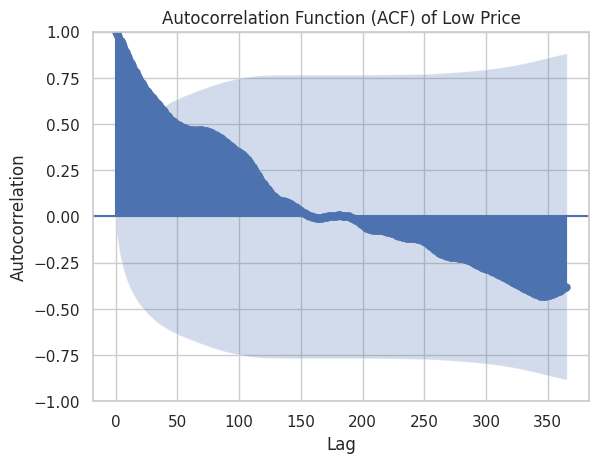

In [65]:
plot_acf(filtered_low_data, lags=365)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Low Price')
plt.show()

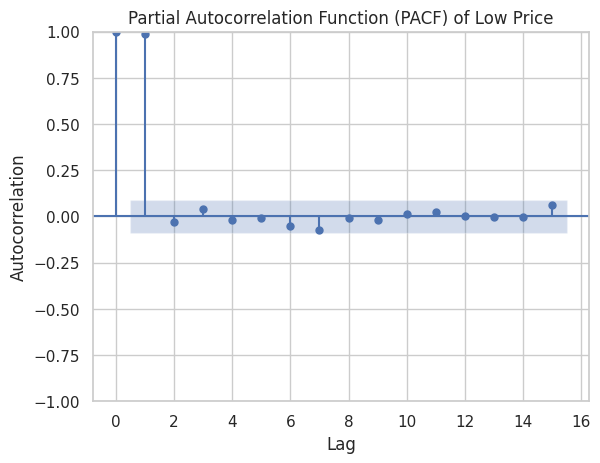

In [66]:
plot_pacf(filtered_low_data, lags=15)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Low Price')
plt.show()

In [67]:
average_lowprice_per_year = df.groupby(df.index.year)['Low'].mean()

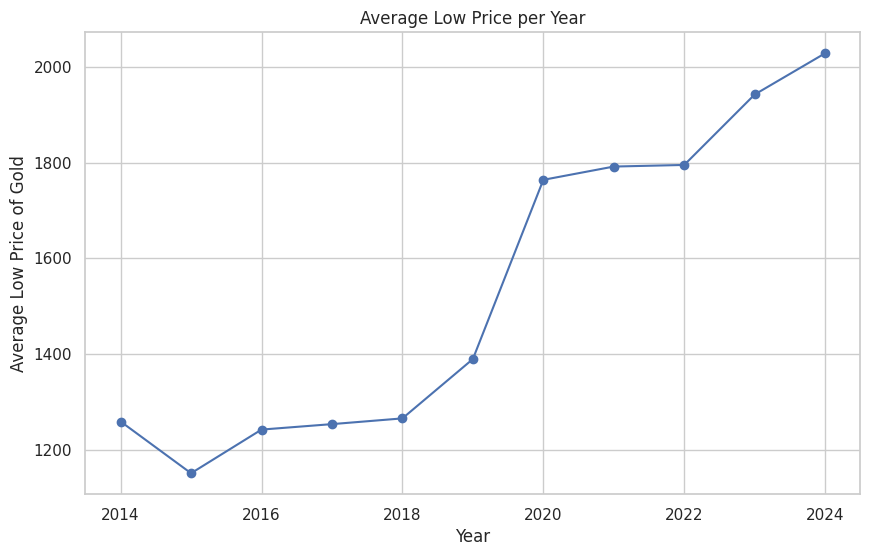

In [68]:
average_lowprice_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Low Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Low Price of Gold')
plt.grid(True)
plt.show()

Volume Time Series Analysis

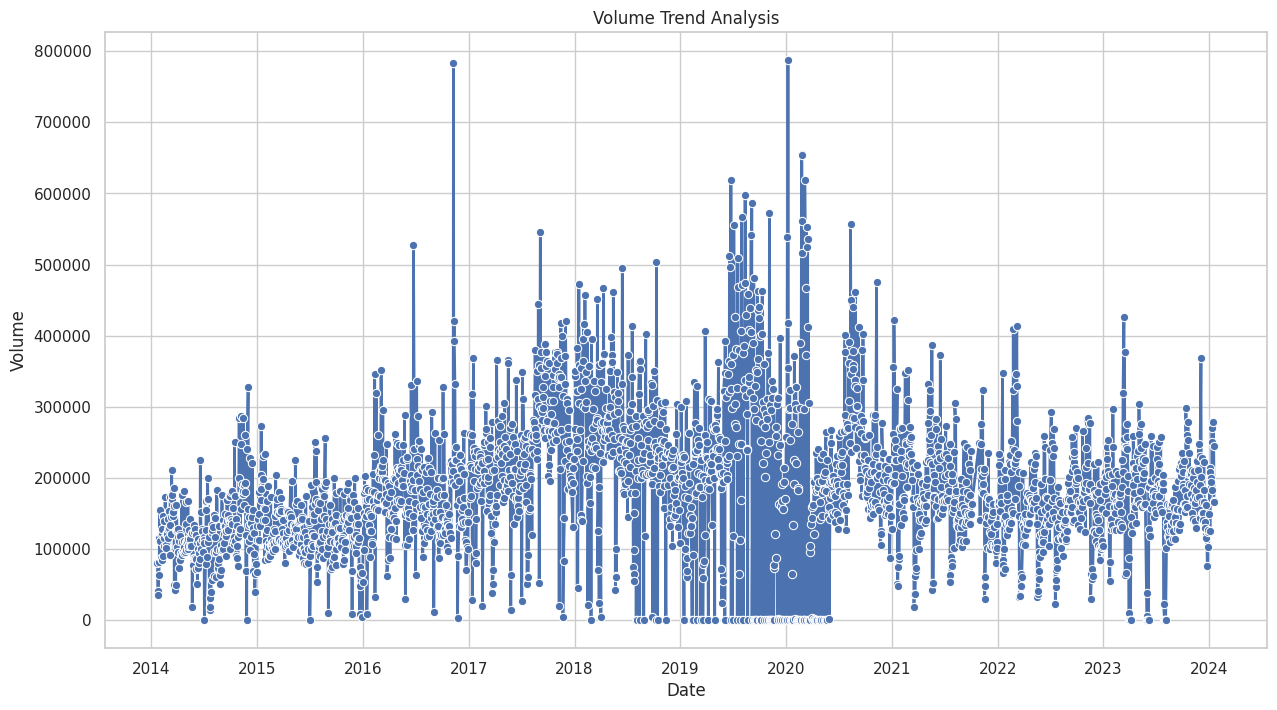

In [69]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=df.index, y=df['Volume'], marker='o', color='b', linewidth=2)

plt.title('Volume Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()

In [70]:
volume_data = df['Volume'].values

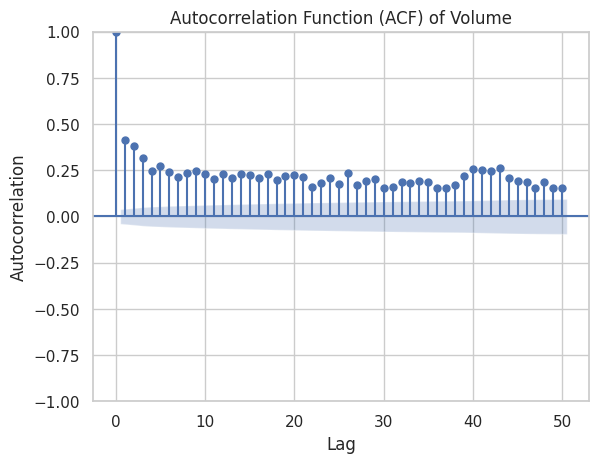

In [71]:
plot_acf(volume_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Volume')
plt.show()

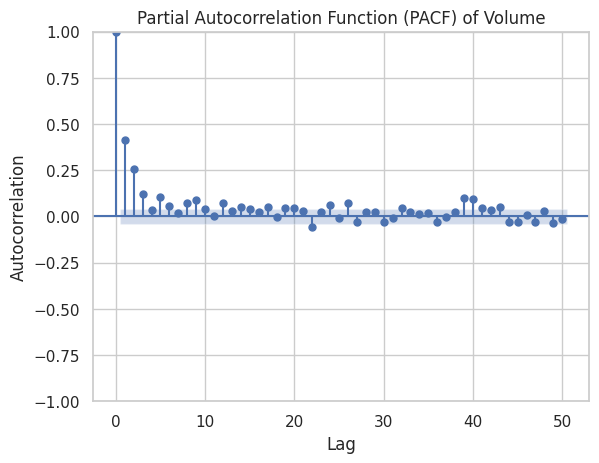

In [72]:
plot_pacf(volume_data, lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Volume')
plt.show()

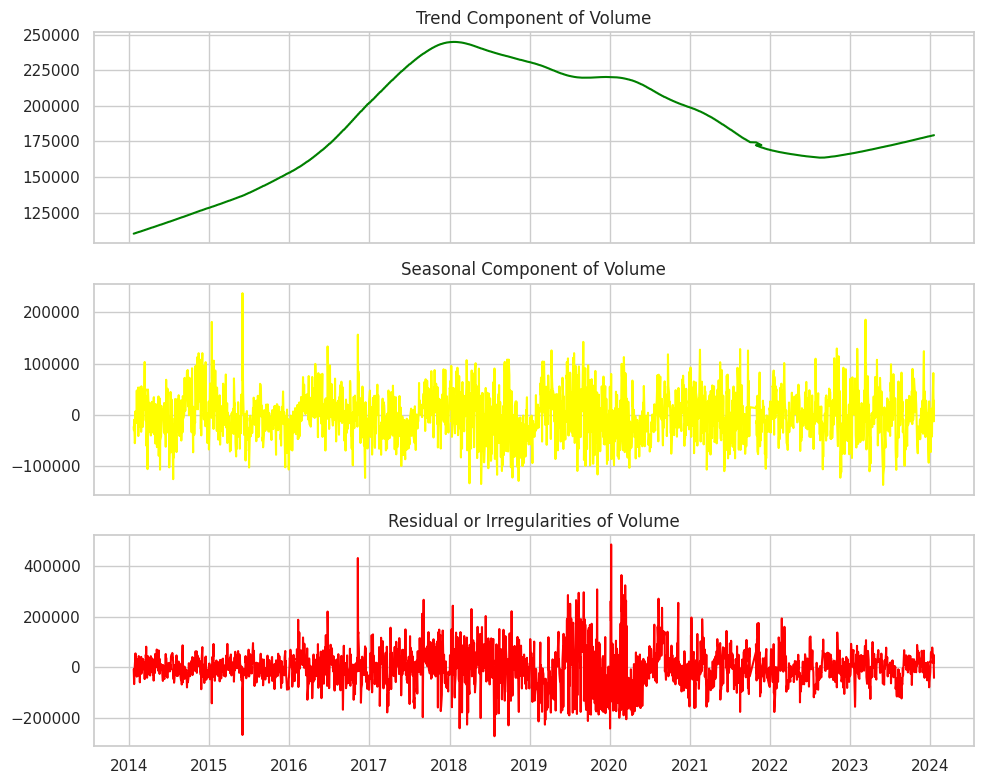

In [73]:
stl = STL(volume_data, period=365)  
analysis = stl.fit()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

ax1.plot(df.index, analysis.trend, label='Trend', color='green')
ax1.set_title('Trend Component of Volume')

ax2.plot(df.index, analysis.seasonal, label='Seasonal', color='yellow')
ax2.set_title('Seasonal Component of Volume')

ax3.plot(df.index, analysis.resid, label='Residual', color='red')
ax3.set_title('Residual or Irregularities of Volume')

plt.tight_layout()

plt.show()

In [74]:
#Statistical test for Stationarity
result = adfuller(volume_data)
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -4.686696754540333
P-value: 8.913083344210008e-05


In [75]:
filtered_volume_data = filtered_df['Volume']

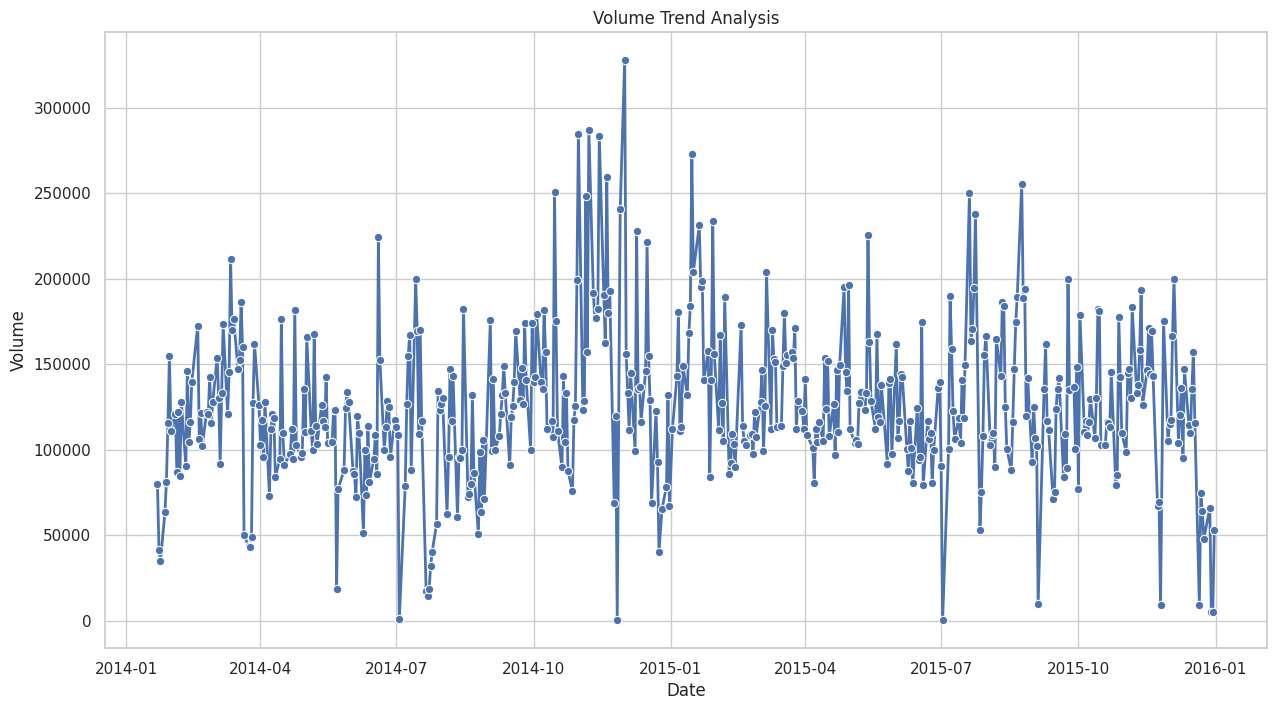

In [76]:
sns.set(style="whitegrid")  
plt.figure(figsize=(15,8))   

sns.lineplot(x=filtered_df.index, y=filtered_df['Volume'], marker='o', color='b', linewidth=2)

plt.title('Volume Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

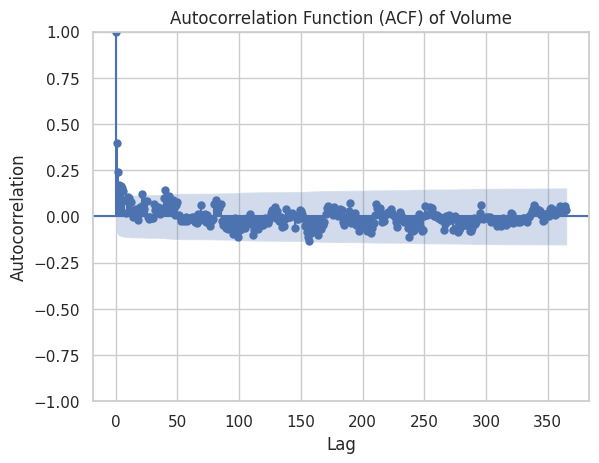

In [77]:
plot_acf(filtered_volume_data, lags=365)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Volume')
plt.show()

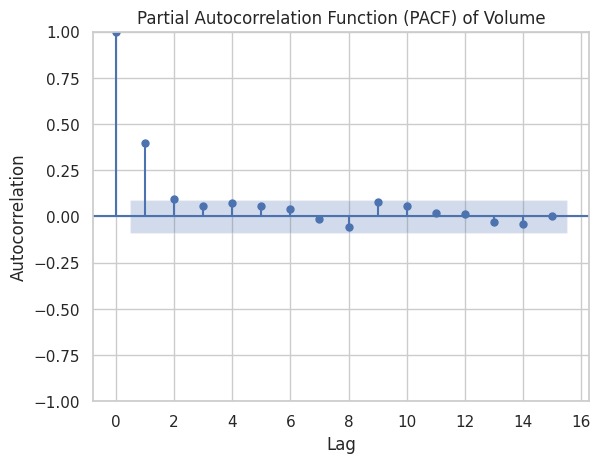

In [78]:
plot_pacf(filtered_volume_data, lags=15)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of Volume')
plt.show()

In [79]:
average_volume_per_year = df.groupby(df.index.year)['Volume'].mean()

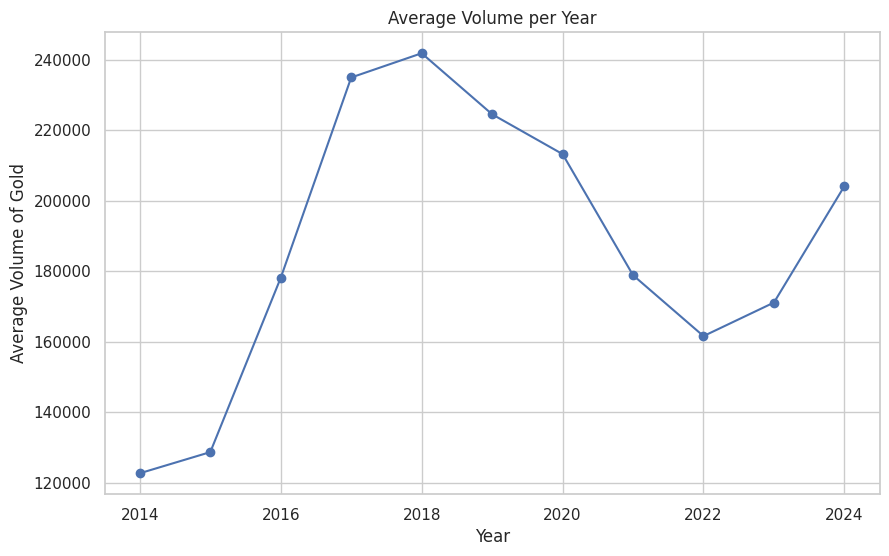

In [80]:
average_volume_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Volume per Year')
plt.xlabel('Year')
plt.ylabel('Average Volume of Gold')
plt.grid(True)
plt.show()

Feature Engineering

In [81]:
# Creating column for Daily Returns
df['Daily_Returns'] = df['Close'].pct_change()

In [82]:
# Creating a new feature of moving average for 30 days
df['Moving_Average_30days'] = df['Close'].rolling(window=30).mean()

In [83]:
# Creating a feature to understand volatility for 30 days
df['Volatility'] = df['Daily_Returns'].rolling(window=30).std()

In [84]:
# Viewing null values attained from feature engineering 
df.isnull().sum()

Close                     0
Volume                    0
Open                      0
High                      0
Low                       0
Daily_Returns             1
Moving_Average_30days    29
Volatility               30
dtype: int64

In [85]:
columns_added = ['Daily_Returns','Moving_Average_30days','Volatility']
for coln in columns_added:
    df[coln] = df[coln].fillna(0) #filled null values with 0

In [86]:
# Viewing null values again attained from feature engineering 
df.isnull().sum()

Close                    0
Volume                   0
Open                     0
High                     0
Low                      0
Daily_Returns            0
Moving_Average_30days    0
Volatility               0
dtype: int64

### **Model Predictions**

Preparing valdiation, train, and test data

In [87]:
# Split data into train and test data 
modeltraindata = df[df.index < '2023-01-01']
modeltestdata = df[df.index >= '2023-01-01']

In [88]:
modeltraindata.head()

Close    Volume    Open    High     Low  Daily_Returns  \
Date                                                                  
2022-12-30  1826.2  103926.0  1821.8  1832.4  1819.8      -0.010779   
2022-12-29  1826.0  103283.0  1812.3  1827.3  1811.2      -0.000110   
2022-12-28  1815.8  110705.0  1822.4  1822.8  1804.2      -0.005586   
2022-12-27  1823.1  156189.0  1808.2  1841.9  1808.0       0.004020   
2022-12-23  1804.2  100413.0  1801.0  1812.2  1798.9      -0.010367   

            Moving_Average_30days  Volatility  
Date                                           
2022-12-30            1900.660000    0.008372  
2022-12-29            1899.410000    0.008372  
2022-12-28            1897.453333    0.008325  
2022-12-27            1895.606667    0.008357  
2022-12-23            1892.723333    0.008405

In [89]:
modeltestdata.head()

Close    Volume    Open    High     Low  Daily_Returns  \
Date                                                                  
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2       0.000000   
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7      -0.003794   
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6      -0.007469   
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6       0.011812   
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1       0.010541   

            Moving_Average_30days  Volatility  
Date                                           
2024-01-19                    0.0         0.0  
2024-01-18                    0.0         0.0  
2024-01-17                    0.0         0.0  
2024-01-16                    0.0         0.0  
2024-01-12                    0.0         0.0

In [90]:
y = modeltraindata['Close']
X = modeltraindata.drop(columns=['Close'])

In [91]:
# Splitting data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
y_test = modeltestdata['Close']

In [93]:
X_test = modeltestdata.drop(columns=['Close'])

#### Sarima Model

In [94]:
arima_model = auto_arima(y_train, exogenous=X_train, seasonal=True, m=24, trend="t", stepwise=True, suppress_warnings=True, error_action='ignore', trace=True)  
arima_model.fit(y_train)
arima_forecast = arima_model.predict(len(y_val))
arima_mse = mean_squared_error(y_val, arima_forecast)
print("ARIMA MSE:", arima_mse)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=14.08 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=29021.086, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=14.51 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=27309.750, Time=5.48 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=29021.086, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=27851.984, Time=0.50 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=19.47 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=27016.757, Time=25.27 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=27181.812, Time=64.64 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=27402.189, Time=19.03 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=inf, Time=56.53 sec
 ARIMA(0,0,2)(0,0,2)[24] intercept   : AIC=26758.198, Time=30.77 sec
 ARIMA(0,0,2)(0,0,1)[24] intercept   : AIC=26993.775, Time=7.99 sec
 ARIMA(0,0,2)(1,0,2)[24] intercept   : AIC=27212.644, Time=75.39 sec
 ARIMA(0,0,2)(1,0,1)

In [95]:
len(y_val)

450

In [96]:
len(arima_forecast)

450

In [97]:
arima_forecast

1798    1435.058760
1799    1434.052217
1800    1399.342817
1801    1423.699277
1802    1408.262256
           ...     
2243    1472.618077
2244    1472.756656
2245    1472.895367
2246    1473.034212
2247    1473.173191
Length: 450, dtype: float64

In [98]:
import numpy as np

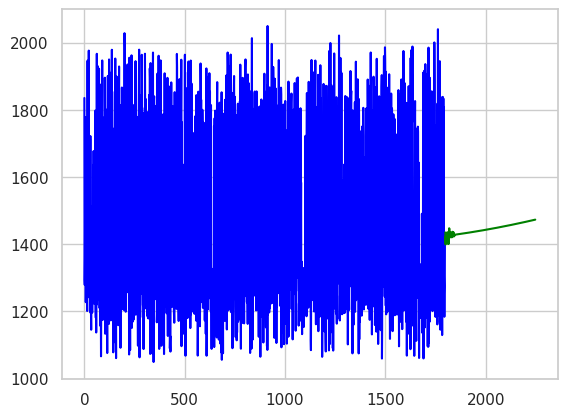

In [99]:
x = np.arange(modeltraindata.shape[0])
plt.plot(x[:1798],y_train, c='blue')
plt.plot(x[1798:], arima_forecast, c='green')
plt.show()

In [100]:
arima_forecast_test = arima_model.predict(len(y_test))
arima_testmse = mean_squared_error(y_test, arima_forecast_test)
arima_test_rmse = np.sqrt(arima_testmse)
print("ARIMA MSE:", arima_testmse)
print("ARIMA RMSE:", arima_test_rmse)

ARIMA MSE: 276575.8865178567
ARIMA RMSE: 525.9048264827551


In [101]:
len(y_test)

263

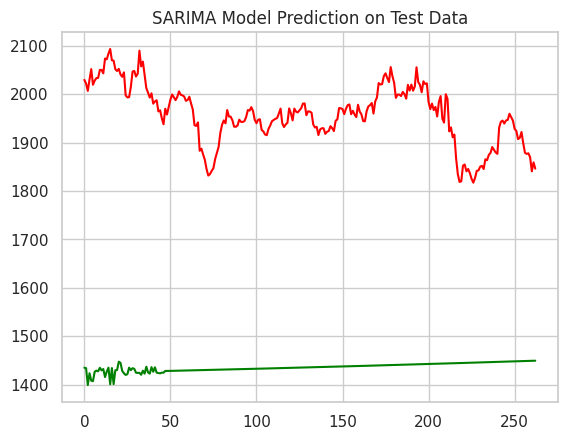

In [102]:
x = np.arange(y_test.shape[0])
plt.plot(x[0:264], arima_forecast_test, c='green')
plt.plot(x[0:264], y_test, c='red')
plt.title('SARIMA Model Prediction on Test Data')
plt.show()

In [103]:
len(arima_forecast_test)

263

In [104]:
arima_forecast_test

1798    1435.058760
1799    1434.052217
1800    1399.342817
1801    1423.699277
1802    1408.262256
           ...     
2056    1449.067801
2057    1449.181123
2058    1449.294582
2059    1449.408178
2060    1449.521911
Length: 263, dtype: float64

In [105]:
arima_model.aic()

25266.707015183307

In [106]:
arima_model.bic()

25305.168026688527

In [107]:
print(arima_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 1798
Model:             SARIMAX(2, 0, 1)x(0, 0, [1, 2], 24)   Log Likelihood              -12626.354
Date:                                 Sat, 09 Mar 2024   AIC                          25266.707
Time:                                         21:56:59   BIC                          25305.168
Sample:                                              0   HQIC                         25280.905
                                                - 1798                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0001      0.000      0.720      0.471      -0.000       0

#### Holt-Winters Model

In [108]:
hwmodel = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=24)
fitted_model = hwmodel.fit()

In [109]:
forecasthwm = fitted_model.forecast(steps=len(y_val))

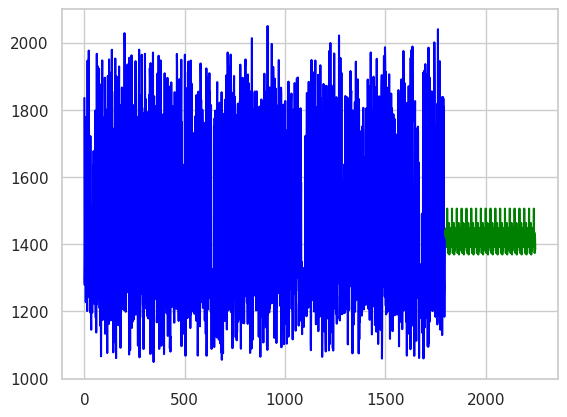

In [110]:
x = np.arange(modeltraindata.shape[0])
plt.plot(x[:1798],y_train, c='blue')
plt.plot(x[1798:], forecasthwm, c='green')
plt.show()

In [111]:
holtwinter_mse = mean_squared_error(y_val, forecasthwm)
holtwinter_rmse = np.sqrt(holtwinter_mse)
print("HoltWinter MSE:", holtwinter_mse)
print("HoltWinter RMSE:", holtwinter_rmse)

HoltWinter MSE: 77589.58901208884
HoltWinter RMSE: 278.549078282605


In [112]:
forecasthwmtest = fitted_model.forecast(steps=len(y_test))

In [113]:
holtwinter_mse_test = mean_squared_error(y_test, forecasthwmtest)
holtwinter_rmse_test = np.sqrt(holtwinter_mse_test)
print("HoltWinter MSE:", holtwinter_mse_test)
print("HoltWinter RMSE:", holtwinter_rmse_test)

HoltWinter MSE: 291802.9285989669
HoltWinter RMSE: 540.1878641722404


In [114]:
y_test

Date
2024-01-19    2029.3
2024-01-18    2021.6
2024-01-17    2006.5
2024-01-16    2030.2
2024-01-12    2051.6
               ...  
2023-01-09    1877.8
2023-01-06    1869.7
2023-01-05    1840.6
2023-01-04    1859.0
2023-01-03    1846.1
Name: Close, Length: 263, dtype: float64

In [115]:
forecasthwmtest

1798    1440.673909
1799    1425.484941
1800    1440.247723
1801    1434.467670
1802    1418.881552
           ...     
2056    1418.255064
2057    1463.346602
2058    1435.107573
2059    1369.503100
2060    1413.449900
Length: 263, dtype: float64

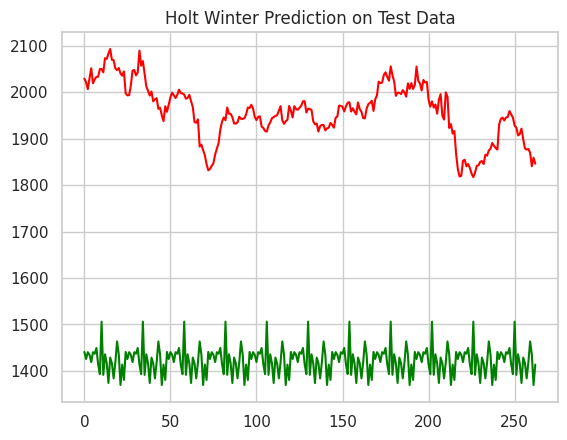

In [116]:
x = np.arange(y_test.shape[0])
plt.plot(x[0:264], forecasthwmtest, c='green')
plt.plot(x[0:264], y_test, c='red')
plt.title('Holt Winter Prediction on Test Data')
plt.show()

#### Linear Regression

In [117]:
lrmodel = LinearRegression()

In [118]:
param_grid = {
    'fit_intercept': [True, False]    
}

In [119]:
grid_search = GridSearchCV(estimator=lrmodel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_lrmodel = grid_search.best_estimator_

y_predval = best_lrmodel.predict(X_val)

In [120]:
mse = np.mean((y_predval - y_val) ** 2)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse)

Mean Squared Error (MSE) for Linear Regression: 31.292214884050882
Root Mean Squared Error (RMSE) for Linear Regression: 5.593944483461637


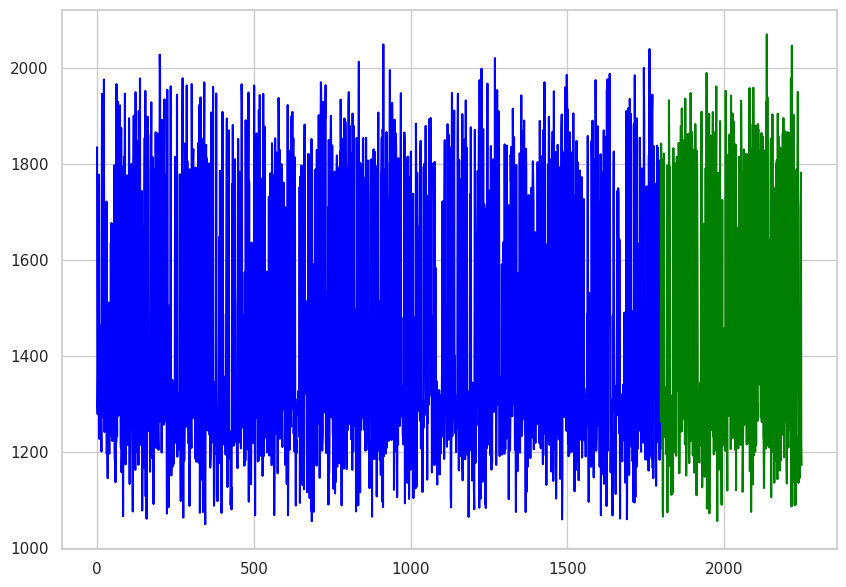

In [121]:
plt.figure(figsize=(10,7))
x = np.arange(modeltraindata.shape[0])
plt.plot(x[:1798],y_train, c='blue')
plt.plot(x[1798:], y_predval, c='green')
plt.show()

In [122]:
predictions_test = best_lrmodel.predict(X_test)

In [123]:
mse = np.mean((predictions_test - y_test) ** 2)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse)

Mean Squared Error (MSE) for Linear Regression: 123.04558377763654
Root Mean Squared Error (RMSE) for Linear Regression: 11.092591391448462


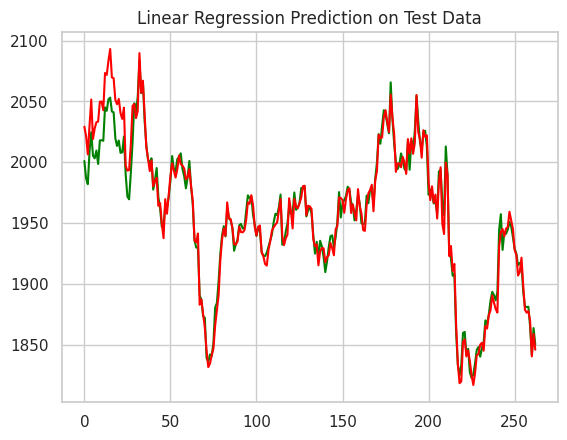

In [124]:
x = np.arange(y_test.shape[0])
plt.plot(x[0:264], predictions_test, c='green')
plt.plot(x[0:264],y_test, c='red')
plt.title('Linear Regression Prediction on Test Data')
plt.show()

#### Decision Tree

In [125]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [126]:
modeldt = DecisionTreeRegressor()

In [127]:
grid_searchdt = GridSearchCV(estimator=modeldt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_searchdt.fit(X_train, y_train)

best_paramsdt = grid_searchdt.best_params_
best_scoredt = -grid_searchdt.best_score_

best_modeldt = grid_searchdt.best_estimator_

y_predvaldt = best_modeldt.predict(X_val)

In [128]:
mse = np.mean((y_predvaldt - y_val) ** 2)
print("Mean Squared Error (MSE) for Decision Tree:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Decision Tree:", rmse)

Mean Squared Error (MSE) for Decision Tree: 95.89265555888406
Root Mean Squared Error (RMSE) for Decision Tree: 9.792479540896885


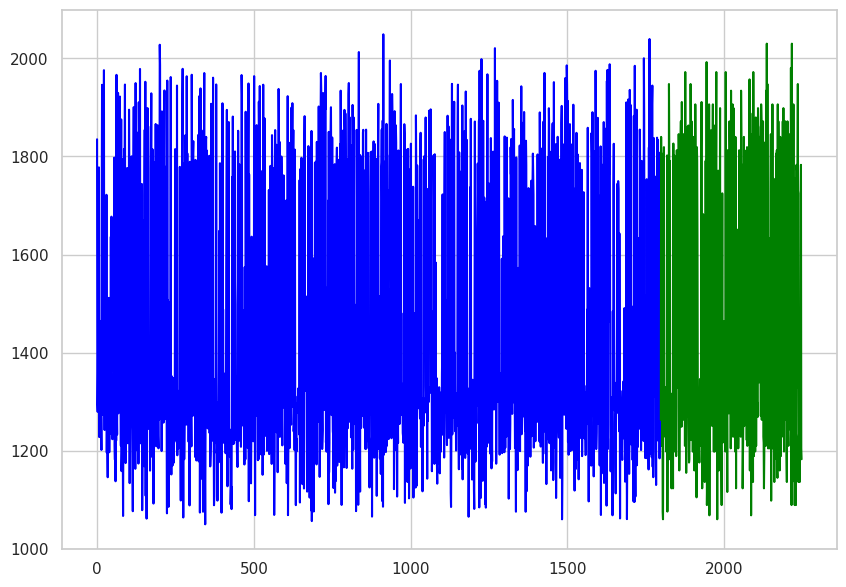

In [129]:
plt.figure(figsize=(10,7))
x = np.arange(modeltraindata.shape[0])
plt.plot(x[:1798],y_train, c='blue')
plt.plot(x[1798:], y_predvaldt, c='green')
plt.show()

In [130]:
predictions_testdt = best_modeldt.predict(X_test)

In [131]:
mse = np.mean((predictions_testdt - y_test) ** 2)
print("Mean Squared Error (MSE) for Decision Tree:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Decision Tree:", rmse)

Mean Squared Error (MSE) for Decision Tree: 306.25416476337693
Root Mean Squared Error (RMSE) for Decision Tree: 17.50011899283479


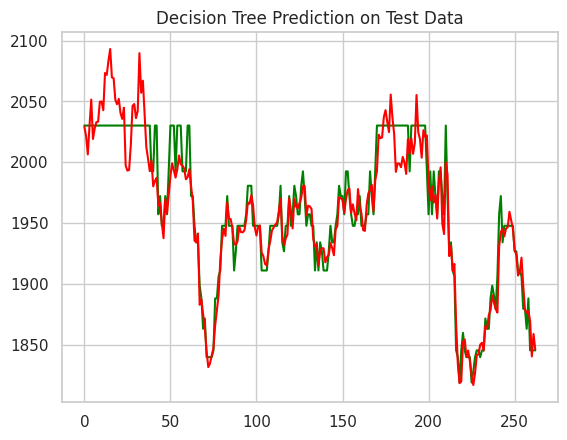

In [132]:
x = np.arange(y_test.shape[0])
plt.plot(x[0:264], predictions_testdt, c='green')
plt.plot(x[0:264], y_test, c='red')
plt.title('Decision Tree Prediction on Test Data')
plt.show()

#### Random Forest

In [133]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [134]:
modelrf = RandomForestRegressor()

In [135]:
grid_searchrf = GridSearchCV(estimator=modelrf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_searchrf.fit(X_train, y_train)

best_paramsrf = grid_searchrf.best_params_
best_scorerf = -grid_searchrf.best_score_

best_modelrf = grid_searchrf.best_estimator_

y_predvalrf = best_modelrf.predict(X_val)

In [136]:
mse = np.mean((y_predvalrf - y_val) ** 2)
print("Mean Squared Error (MSE) for Random Forest:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse)

Mean Squared Error (MSE) for Random Forest: 61.5585085922576
Root Mean Squared Error (RMSE) for Random Forest: 7.845923055463748


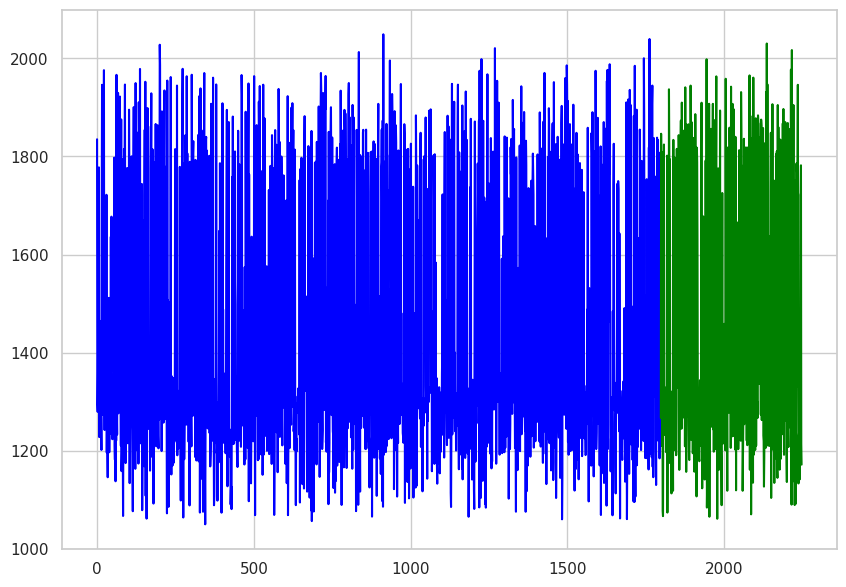

In [137]:
plt.figure(figsize=(10,7))
x = np.arange(modeltraindata.shape[0])
plt.plot(x[:1798],y_train, c='blue')
plt.plot(x[1798:], y_predvalrf, c='green')
plt.show()

In [138]:
predictions_testrf = best_modelrf.predict(X_test)

In [139]:
mse = np.mean((predictions_testrf - y_test) ** 2)
print("Mean Squared Error (MSE) for Random Forest:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse)

Mean Squared Error (MSE) for Random Forest: 184.31172611800227
Root Mean Squared Error (RMSE) for Random Forest: 13.576145480879404


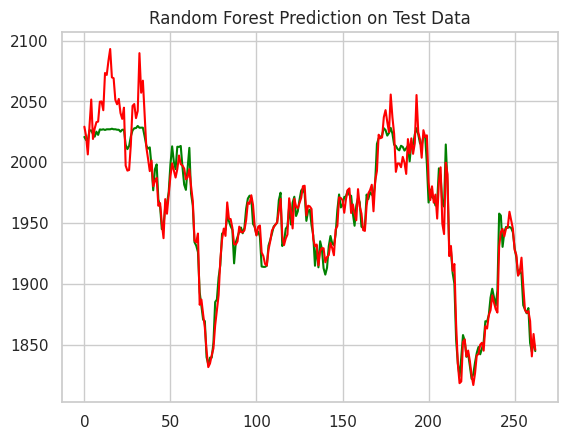

In [140]:
x = np.arange(y_test.shape[0])
plt.plot(x[0:264], predictions_testrf, c='green')
plt.plot(x[0:264], y_test, c='red')
plt.title('Random Forest Prediction on Test Data')
plt.show()

#### BackTest Trading Strategy

In [141]:
!pip install backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=2abff591cd2b90475468b128a5ca11d7f06bd0e4fa0283d38ac5fafed7429b63
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


Loading BokehJS ...

In [142]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class BacktestStrategy(Strategy):
    def init(self):
        self.vwap = self.I(VWAP, self.data.Close, self.data.Volume)

    def next(self):
        if crossover(self.data.Close, self.vwap):
            self.buy()
        elif crossover(self.vwap, self.data.Close):
            self.sell()
            
def VWAP(close, volume):
    return (close * volume).cumsum() / volume.cumsum()

backteststr = Backtest(df, BacktestStrategy, cash=2000, commission=0.001)

stats = backteststr .run()

print(stats)

Start                     2014-01-22 00:00:00
End                       2024-01-19 00:00:00
Duration                   3649 days 00:00:00
Exposure Time [%]                   99.800876
Equity Final [$]                    1227.1442
Equity Peak [$]                     2204.9442
Return [%]                          -38.64279
Buy & Hold Return [%]               63.838204
Return (Ann.) [%]                   -4.817565
Volatility (Ann.) [%]               14.580889
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -47.325461
Avg. Drawdown [%]                   -4.581526
Max. Drawdown Duration     2955 days 00:00:00
Avg. Drawdown Duration      227 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                     -61.604509
Worst Trade [%]                    -61.604509
Avg. Trade [%]                    